In [131]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sc
from scipy.stats import linregress

In [132]:
def f(x, alpha_damage_propagation, disease_rate, t=None):
    return (1-x)*(alpha_damage_propagation*x + disease_rate)

In [254]:
a = 0.0
b = 100
alpha_damage_propagation = 0.062
coupling_factor = 0.089
mortality_rate = 4.3*(10**(-5))
disease_rate_range = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]

N = 100

x_points = []
temporal_points = []
gompertz_data = []

for disease in disease_rate_range:
    x = 0.0
    h = (b-a)/N
    temporal_individuals_points = np.arange(a,b,h)
    x_individual_points = []
    for t in temporal_individuals_points:
        x_individual_points.append(x)
        k1 = h*f(x, alpha_damage_propagation, disease, t=t)
        k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease, t=t +0.5*h)
        x += k2
    x_individual_points = np.array(x_individual_points)
    gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha_damage_propagation))
    gompertz_data.append(gompertz_individual)
    x_points.append(x_individual_points)
    temporal_points.append(temporal_individuals_points)

/var/folders/66/17kbjnl155x2xgs01s4j4hqr0000gr/T/ipykernel_3686/2962362372.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(temporal_points[i]), np.log(x_points[i]), label = f"{round(disease_rate_range[i],4)}")


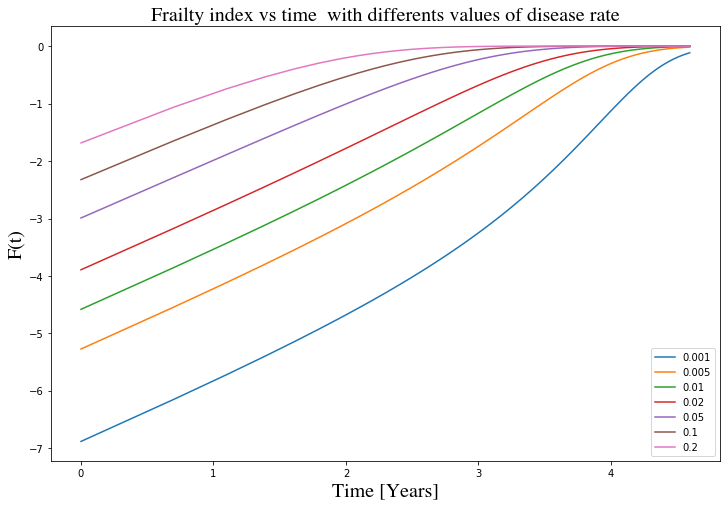

/var/folders/66/17kbjnl155x2xgs01s4j4hqr0000gr/T/ipykernel_3686/2962362372.py:16: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(temporal_points[i]), np.log(gompertz_data[i]), label = f"{round(disease_rate_range[i],4)}")


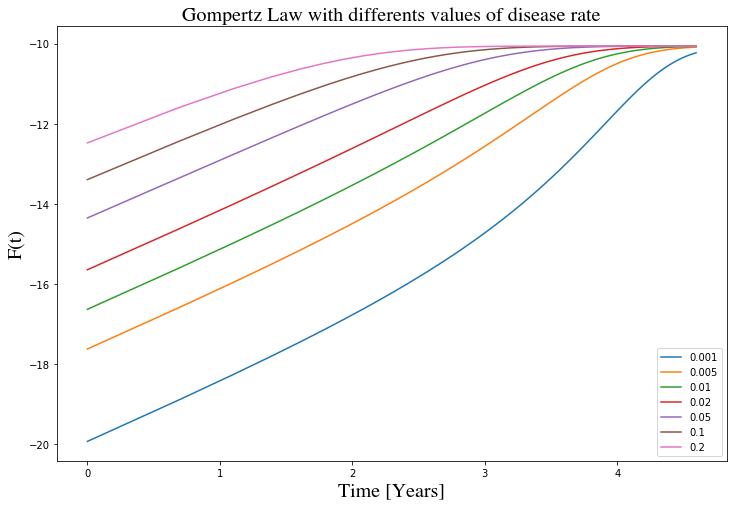

In [255]:
plt.figure(figsize=(12,8))
for i in range(len(disease_rate_range[0:17])):
    plt.plot(np.log(temporal_points[i]), np.log(x_points[i]), label = f"{round(disease_rate_range[i],4)}")
hfont = {'fontname':'Times'}
plt.title(r"Frailty index vs time  with differents values of disease rate", fontsize = 20, **hfont)
plt.xlabel("Time [Years]", fontsize = 20, **hfont)
plt.ylabel("F(t)", fontsize = 20, **hfont)

#plt.axvline(x = 50, ymin = 0, ymax = 0.96, linestyle = "-.", color = "red" )
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i in range(len(disease_rate_range[0:17])):

    plt.plot(np.log(temporal_points[i]), np.log(gompertz_data[i]), label = f"{round(disease_rate_range[i],4)}")
hfont = {'fontname':'Times'}
plt.title(r"Gompertz Law with differents values of disease rate", fontsize = 20, **hfont)
plt.xlabel("Time [Years]", fontsize = 20, **hfont)
plt.ylabel("F(t)", fontsize = 20, **hfont)
#plt.axvline(x = 10, ymin = 0, ymax = 0.96, linestyle = "-.", color = "red" )
plt.legend()
#plt.savefig("GL_disease_rate_modification.jpg", dpi = 500)
plt.show()

In [256]:
def funcion_variacional(valor_a_modificar, rango_de_variacion, alpha_damage_propagation = 0.062,coupling_factor = 0.089, mortality_rate = 4.3*(10**(-5)), disease_rate = 0.02):
    a = 0.0
    b = 100
    N = 100

    x_points = []
    temporal_points = []
    gompertz_data = []

    if valor_a_modificar == 0:
        #Modificacion del valor de alpha
        for alpha_damage_propagation in rango_de_variacion:
            x = 0.0
            h = (b-a)/N
            temporal_individuals_points = np.arange(a,b,h)
            x_individual_points = []
            for t in temporal_individuals_points:
                x_individual_points.append(x)
                k1 = h*f(x, alpha_damage_propagation, disease_rate, t=t)
                k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease_rate, t=t +0.5*h)
                x += k2
            x_individual_points = np.array(x_individual_points)
            gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha_damage_propagation))
            gompertz_data.append(gompertz_individual)
            x_points.append(x_individual_points)
            temporal_points.append(temporal_individuals_points)

    elif valor_a_modificar == 1:
        #Modificacion de coupling
        for coupling_factor in rango_de_variacion:
            x = 0.0
            h = (b-a)/N
            temporal_individuals_points = np.arange(a,b,h)
            x_individual_points = []
            for t in temporal_individuals_points:
                x_individual_points.append(x)
                k1 = h*f(x, alpha_damage_propagation, disease_rate, t=t)
                k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease_rate, t=t +0.5*h)
                x += k2
            x_individual_points = np.array(x_individual_points)
            gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha_damage_propagation))
            gompertz_data.append(gompertz_individual)
            x_points.append(x_individual_points)
            temporal_points.append(temporal_individuals_points)

    elif valor_a_modificar == 2:
        #Modificacion de mortality rate
        for mortality_rate in rango_de_variacion:
            x = 0.0
            h = (b-a)/N
            temporal_individuals_points = np.arange(a,b,h)
            x_individual_points = []
            for t in temporal_individuals_points:
                x_individual_points.append(x)
                k1 = h*f(x, alpha_damage_propagation, disease_rate, t=t)
                k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease_rate, t=t +0.5*h)
                x += k2
            x_individual_points = np.array(x_individual_points)
            gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha_damage_propagation))
            gompertz_data.append(gompertz_individual)
            x_points.append(x_individual_points)
            temporal_points.append(temporal_individuals_points)

    elif valor_a_modificar == 3:
        #Modificacion de disease rate
        for disease_rate in rango_de_variacion:
            x = 0.0
            h = (b-a)/N
            temporal_individuals_points = np.arange(a,b,h)
            x_individual_points = []
            for t in temporal_individuals_points:
                x_individual_points.append(x)
                k1 = h*f(x, alpha_damage_propagation, disease_rate, t=t)
                k2 = h*f(x+0.5*k1, alpha_damage_propagation, disease_rate, t=t +0.5*h)
                x += k2
            x_individual_points = np.array(x_individual_points)
            gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha_damage_propagation))
            gompertz_data.append(gompertz_individual)
            x_points.append(x_individual_points)
            temporal_points.append(temporal_individuals_points)
    return x_points,  temporal_points, gompertz_data 

In [257]:
alpha_damage_range = [0.031*0.5, 0.031*1, 0.031*2]
coupling_factor_range = [0.089*0.25, 0.089*0.5, 0.089*0.75, 0.089*1, 0.089*1.25, 0.089*1.5, 0.089*1.75, 0.089*2]
mortality_rate_range = [4.3*(10**(-5)), 4.3*(10**(-4)), 4.3*(10**(-3)), 4.3*(10**(-2)), 4.3*(10**(-1))]
disease_rate_range = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]

In [258]:
X_data_alpha, temporal_data_alpha, gompertz_data_alpha = funcion_variacional(0,alpha_damage_range)
X_data_coupling, temporal_data_coupling, gompertz_data_coupling = funcion_variacional(1,coupling_factor_range)
X_data_mortality, temporal_data_mortality, gompertz_data_mortality = funcion_variacional(2,mortality_rate_range)
X_data_disease, temporal_data_disease, gompertz_data_disease = funcion_variacional(3,disease_rate_range)

/var/folders/66/17kbjnl155x2xgs01s4j4hqr0000gr/T/ipykernel_3686/2215253340.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(temporal_data_alpha[i]), np.log(X_data_alpha[i]), label = f"{round(alpha_damage_range[i],4)}")


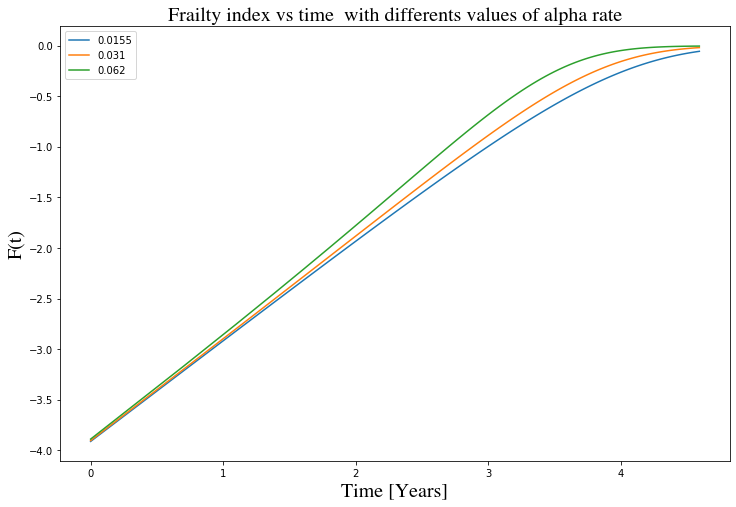

/var/folders/66/17kbjnl155x2xgs01s4j4hqr0000gr/T/ipykernel_3686/2215253340.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(temporal_data_alpha[i]), np.log(gompertz_data_alpha[i]), label = f"{round(alpha_damage_range[i],4)}")


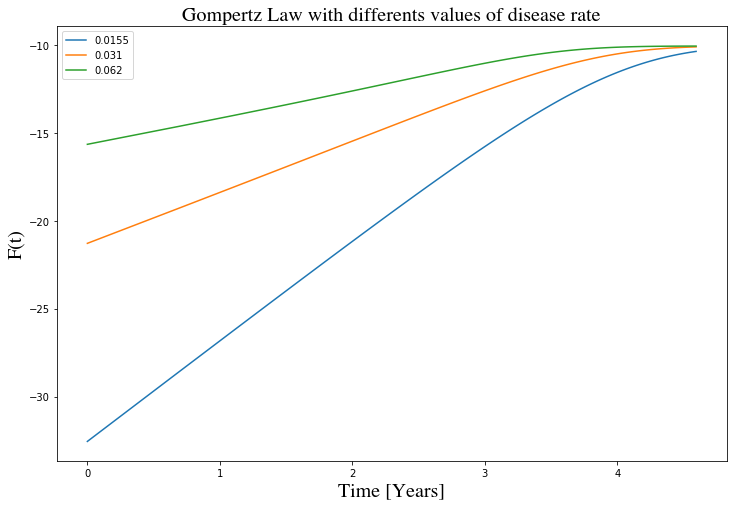

In [259]:
plt.figure(figsize=(12,8))
for i in range(len(X_data_alpha[0:17])):
    plt.plot(np.log(temporal_data_alpha[i]), np.log(X_data_alpha[i]), label = f"{round(alpha_damage_range[i],4)}")
hfont = {'fontname':'Times'}
plt.title(r"Frailty index vs time  with differents values of alpha rate", fontsize = 20, **hfont)
plt.xlabel("Time [Years]", fontsize = 20, **hfont)
plt.ylabel("F(t)", fontsize = 20, **hfont)
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i in range(len(X_data_alpha[0:17])):

    plt.plot(np.log(temporal_data_alpha[i]), np.log(gompertz_data_alpha[i]), label = f"{round(alpha_damage_range[i],4)}")
hfont = {'fontname':'Times'}
plt.title(r"Gompertz Law with differents values of disease rate", fontsize = 20, **hfont)
plt.xlabel("Time [Years]", fontsize = 20, **hfont)
plt.ylabel("F(t)", fontsize = 20, **hfont)
plt.legend()
plt.show()

In [260]:
slopes_frailty_index_alpha = []
intercept_frailty_index_alpha = []
for i in range(len(gompertz_data_alpha)):
    Y = np.log(gompertz_data_alpha[i][2:60])
    X = np.log(temporal_data_alpha[i][2:60])

    slopes_frailty_index_alpha.append(linregress(X, Y)[0])
    intercept_frailty_index_alpha.append(linregress(X, Y)[1])

In [261]:
slopes_frailty_index_coupling = []
intercept_frailty_index_coupling = []
for i in range(len(gompertz_data_coupling)):
    Y = np.log(gompertz_data_coupling[i][2:60])
    X = np.log(temporal_data_coupling[i][2:60])

    slopes_frailty_index_coupling.append(linregress(X, Y)[0])
    intercept_frailty_index_coupling.append(linregress(X, Y)[1])


In [262]:
slopes_frailty_index_mortality = []
intercept_frailty_index_mortality = []
for i in range(len(gompertz_data_mortality)):
    Y = np.log(gompertz_data_mortality[i][2:60])
    X = np.log(temporal_data_mortality[i][2:60])

    slopes_frailty_index_mortality.append(linregress(X, Y)[0])
    intercept_frailty_index_mortality.append(linregress(X, Y)[1])

In [263]:
slopes_frailty_index_disease = []
intercept_frailty_index_disease = []
for i in range(len(gompertz_data_disease)):
    Y = np.log(gompertz_data_disease[i][2:60])
    X = np.log(temporal_data_disease[i][2:60])

    slopes_frailty_index_disease.append(linregress(X, Y)[0])
    intercept_frailty_index_disease.append(linregress(X, Y)[1])

Text(0, 0.5, 'Intercept Values')

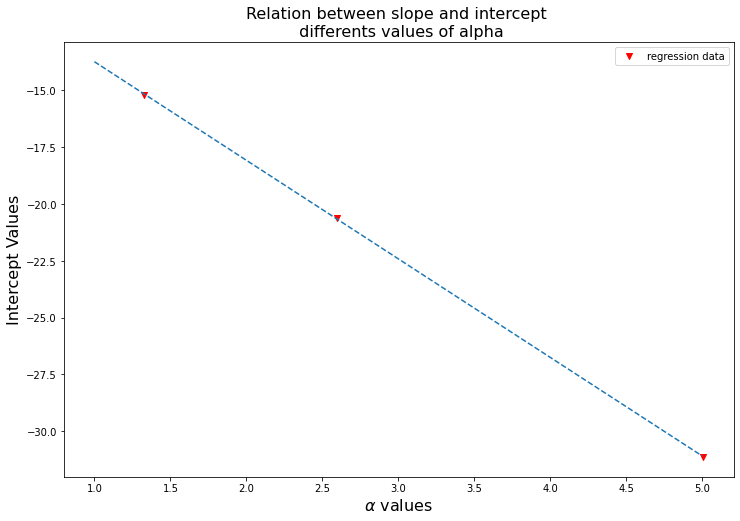

In [264]:
linealizacion = linregress(slopes_frailty_index_alpha, intercept_frailty_index_alpha)
plt.figure(figsize=(12,8))
plt.scatter(slopes_frailty_index_alpha, intercept_frailty_index_alpha, marker = "v" , label="regression data", color = "red")
plt.title("Relation between slope and intercept \n differents values of alpha", fontsize = 16)
plt.plot([1,5], [linealizacion[0]*1 + linealizacion[1], linealizacion[0]*5+linealizacion[1]], linestyle = "--")
plt.legend()
plt.xlabel(r"$\alpha$ values", fontsize = 16)
plt.ylabel("Intercept Values", fontsize = 16)

Text(0, 0.5, 'Intercept Values')

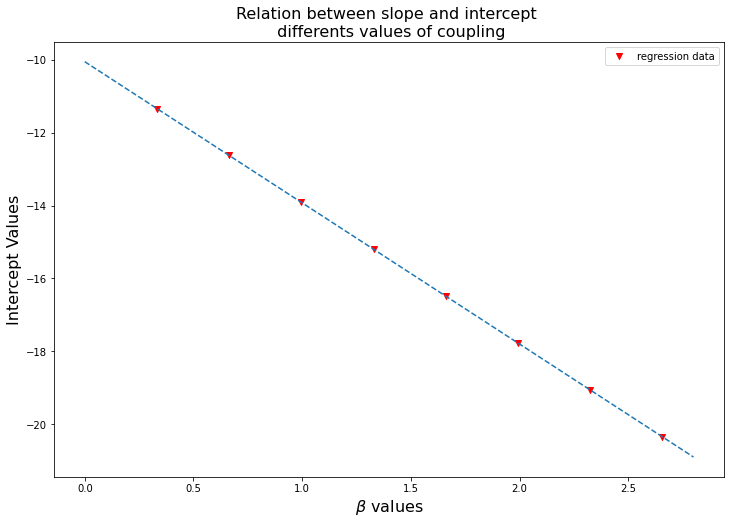

In [265]:
linealizacion = linregress(slopes_frailty_index_coupling, intercept_frailty_index_coupling)
plt.figure(figsize=(12,8))
plt.scatter(slopes_frailty_index_coupling, intercept_frailty_index_coupling, marker = "v" , label="regression data", color = "red")
plt.title("Relation between slope and intercept \n differents values of coupling", fontsize = 16)
plt.plot([0,2.8], [linealizacion[0]*0 + linealizacion[1], linealizacion[0]*2.8+linealizacion[1]], linestyle = "--")
plt.legend()
plt.xlabel(r"$\beta$ values", fontsize = 16)
plt.ylabel("Intercept Values", fontsize = 16)

Text(0, 0.5, 'Intercept Values')

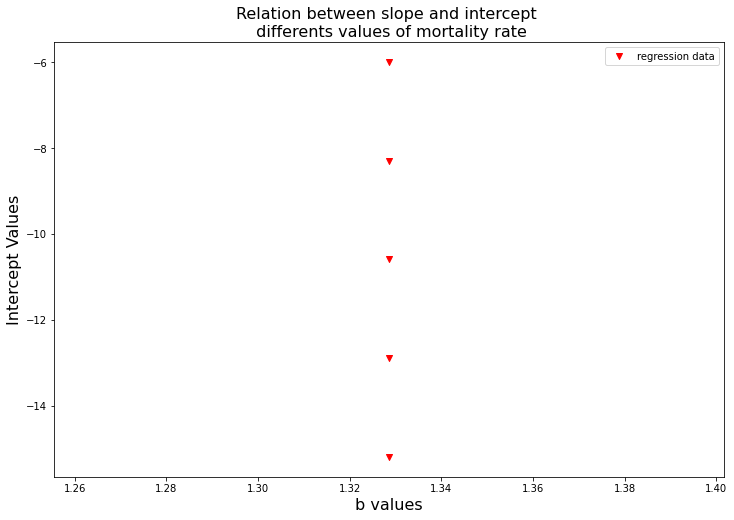

In [266]:
plt.figure(figsize=(12,8))
plt.scatter(slopes_frailty_index_mortality, intercept_frailty_index_mortality, marker = "v" , label="regression data", color = "red")
plt.title("Relation between slope and intercept \n differents values of mortality rate", fontsize = 16)
plt.legend()
plt.xlabel(r"b values", fontsize = 16)
plt.ylabel("Intercept Values", fontsize = 16)

Text(0, 0.5, 'Intercept Values')

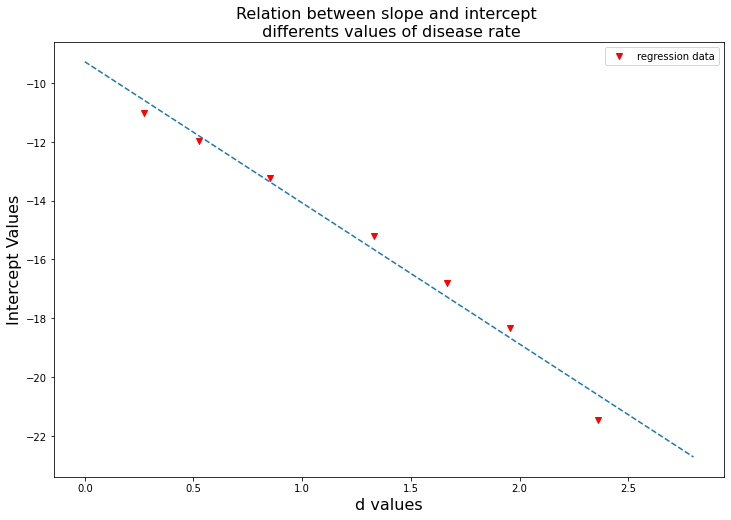

In [267]:
linealizacion = linregress(slopes_frailty_index_disease, intercept_frailty_index_disease)
plt.figure(figsize=(12,8))
plt.scatter(slopes_frailty_index_disease, intercept_frailty_index_disease, marker = "v" , label="regression data", color = "red")
plt.title("Relation between slope and intercept \n differents values of disease rate", fontsize = 16)
plt.plot([0,2.8], [linealizacion[0]*0 + linealizacion[1], linealizacion[0]*2.8+linealizacion[1]], linestyle = "--")
plt.legend()
plt.xlabel(r"d values", fontsize = 16)
plt.ylabel("Intercept Values", fontsize = 16)

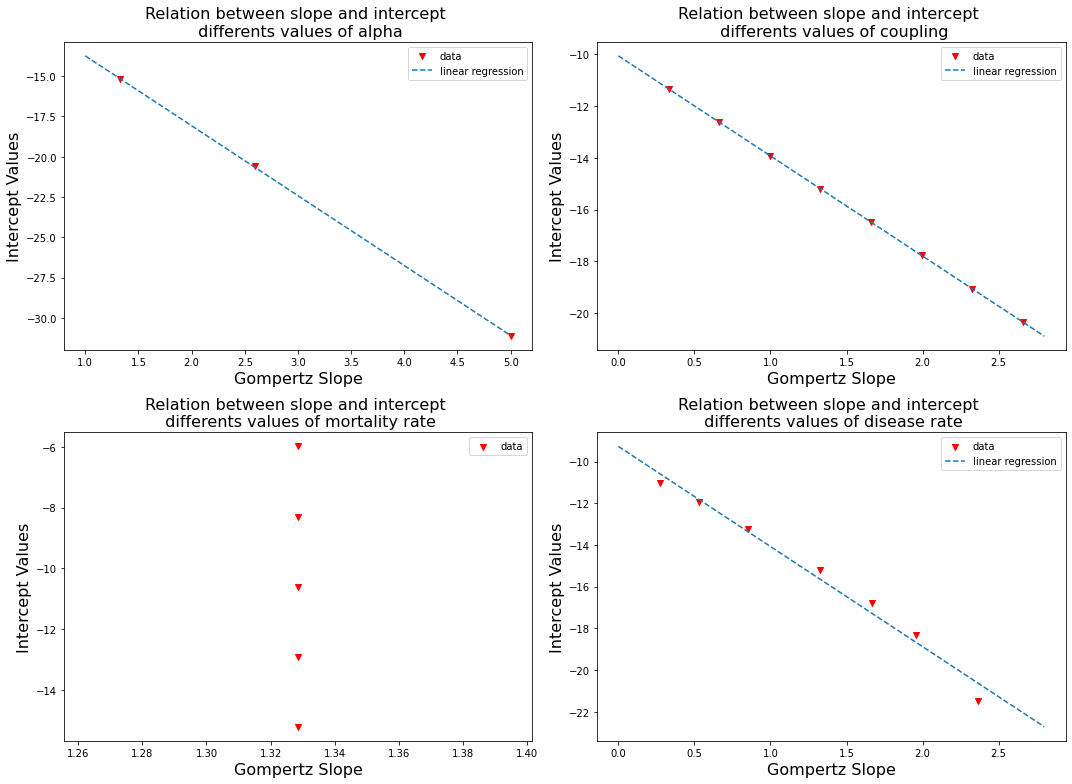

In [269]:
fig, axs = plt.subplots(2, 2, figsize = (15,11))

linealizacion_1 = linregress(slopes_frailty_index_alpha, intercept_frailty_index_alpha)
linealizacion_2 = linregress(slopes_frailty_index_coupling, intercept_frailty_index_coupling)
linealizacion_3 = linregress(slopes_frailty_index_disease, intercept_frailty_index_disease)

axs[0,0].scatter(slopes_frailty_index_alpha, intercept_frailty_index_alpha, marker = "v" , label="data", color = "red")
axs[0,0].set_title("Relation between slope and intercept \n differents values of alpha", fontsize = 16)
axs[0,0].plot([1,5], [linealizacion_1[0]*1 + linealizacion_1[1], linealizacion_1[0]*5+linealizacion_1[1]], linestyle = "--", label = "linear regression")
axs[0,0].legend()
axs[0,0].set_xlabel("Gompertz Slope", fontsize = 16)
axs[0,0].set_ylabel("Intercept Values", fontsize = 16)

axs[0,1].scatter(slopes_frailty_index_coupling, intercept_frailty_index_coupling, marker = "v" , label="data", color = "red")
axs[0,1].set_title("Relation between slope and intercept \n differents values of coupling", fontsize = 16)
axs[0,1].plot([0,2.8], [linealizacion_2[0]*0 + linealizacion_2[1], linealizacion_2[0]*2.8+linealizacion_2[1]], linestyle = "--", label = "linear regression")
axs[0,1].legend()
axs[0,1].set_xlabel("Gompertz Slope", fontsize = 16)
axs[0,1].set_ylabel("Intercept Values", fontsize = 16)

axs[1,0].scatter(slopes_frailty_index_mortality, intercept_frailty_index_mortality, marker = "v" , label="data", color = "red")
axs[1,0].set_title("Relation between slope and intercept \n differents values of mortality rate", fontsize = 16)
axs[1,0].legend()
axs[1,0].set_xlabel("Gompertz Slope", fontsize = 16)
axs[1,0].set_ylabel("Intercept Values", fontsize = 16)

axs[1,1].scatter(slopes_frailty_index_disease, intercept_frailty_index_disease, marker = "v" , label="data", color = "red")
axs[1,1].set_title("Relation between slope and intercept \n differents values of disease rate", fontsize = 16)
axs[1,1].plot([0,2.8], [linealizacion_3[0]*0 + linealizacion_3[1], linealizacion_3[0]*2.8+linealizacion_3[1]], linestyle = "--", label = "linear regression")
axs[1,1].legend()
axs[1,1].set_xlabel("Gompertz Slope", fontsize = 16)
axs[1,1].set_ylabel("Intercept Values", fontsize = 16)

fig.tight_layout()
fig.savefig("Fig3_Strehler_Mildvan.jpg", dpi = 500)